In [6]:
!pip install opencv-python
!pip install opencv-python-headless

   ---------------------------------------- 0.0/38.9 MB ? eta -:--:--
   --------------- ------------------------ 15.5/38.9 MB 81.8 MB/s eta 0:00:01
   ---------------------------------- ----- 33.6/38.9 MB 85.9 MB/s eta 0:00:01
   ---------------------------------------- 38.9/38.9 MB 69.8 MB/s eta 0:00:00


In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from glob import glob

In [17]:
DATASET_PATH = "C:/Users/student/Downloads/archive_(4)/raw-img/sample1"
SAMPLE_SIZE = (64, 64)
QUANTIZATION_LEVELS = [2, 4, 8]

In [18]:
def load_images(path, limit=5):
    """Load a few images from the dataset folder."""
    images = []
    for file in glob(os.path.join(path, "*"))[:limit]:
        img = cv2.imread(file)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            images.append(img)
    return images

In [19]:
def sampling_image(img, size=SAMPLE_SIZE):
    """Reduce resolution to simulate sampling."""
    sampled = cv2.resize(img, size, interpolation=cv2.INTER_NEAREST)
    return sampled

def quantize_image(img, k=8):
    """Quantize image colors using k-means clustering."""
    Z = img.reshape((-1, 3))
    Z = np.float32(Z)

    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(Z)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_

    quantized = centers[labels.flatten()]
    quantized = quantized.reshape(img.shape)

    return quantized, centers

In [20]:
def analyze_sampling(img, sampled):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title("Original Histogram")
    plt.hist(img.ravel(), bins=256, color="blue", alpha=0.7)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)
    plt.title("Sampled Histogram")
    plt.hist(sampled.ravel(), bins=256, color="green", alpha=0.7)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")

    plt.show()

def analyze_quantization(quantized, centers, model="RGB"):
    print(f"Quantized Levels in {model}:", centers)

    plt.imshow(quantized)
    plt.title(f"Quantized Image ({model})")
    plt.axis("off")
    plt.show()


Processing Image 1...


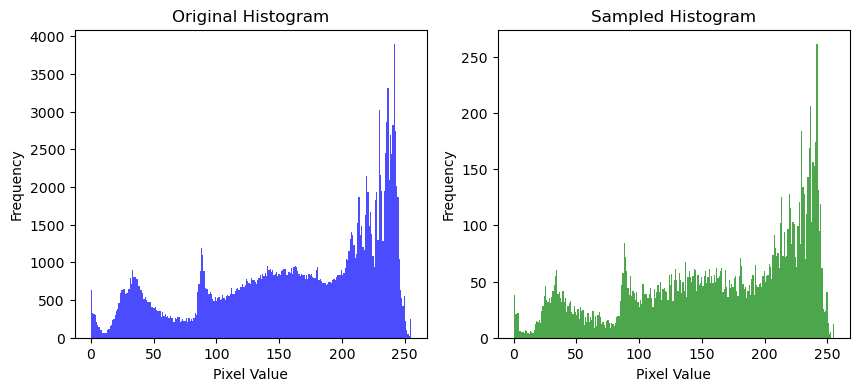

Quantized Levels in RGB: [[114  86  78]
 [220 211 199]]


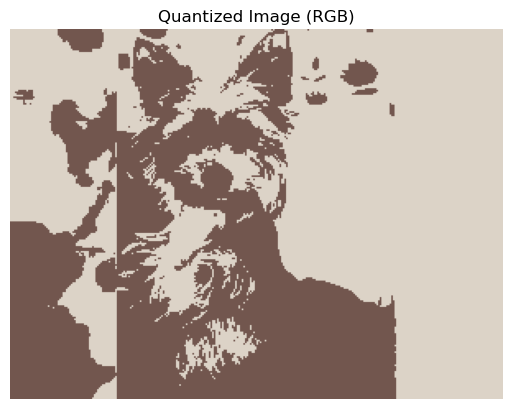

Quantized Levels in RGB: [[232 226 217]
 [126  77  74]
 [174 155 137]
 [ 43  38  34]]


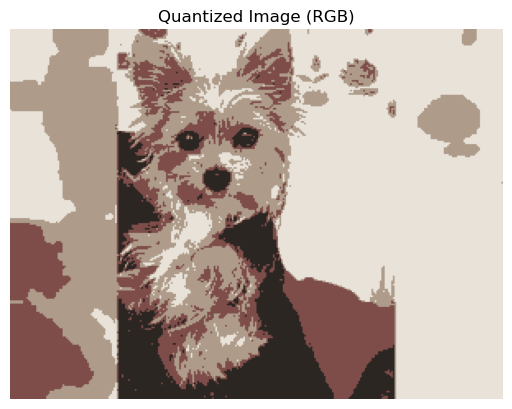

Quantized Levels in RGB: [[221 212 202]
 [135 118 102]
 [168 148 130]
 [ 41  37  33]
 [173   6  36]
 [241 237 229]
 [194 177 160]
 [ 97  87  77]]


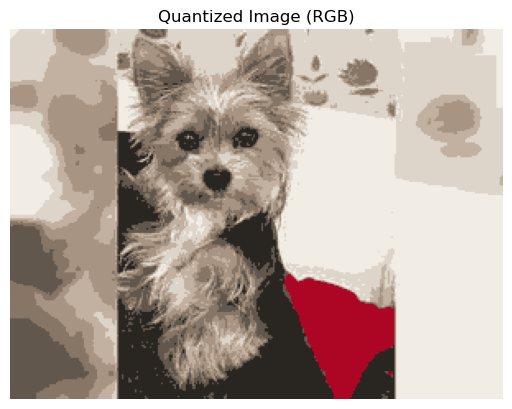

Quantized Levels in HSV: [[ 19  16 232]
 [173 103  80]
 [ 35  35  41]
 [ 14  80 184]
 [174 243 172]
 [ 26  18 106]
 [ 14 110 111]
 [ 18  34 167]]


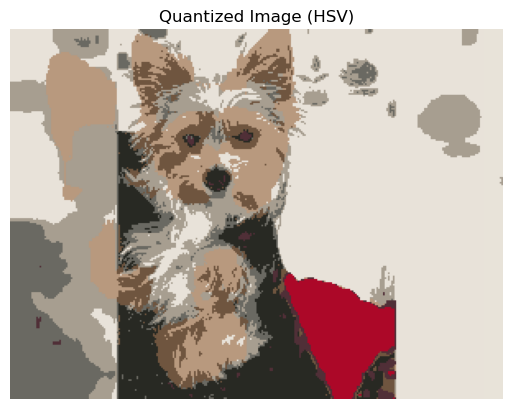

Quantized Levels in Grayscale: [[163 163 163]
 [108 108 108]
 [227 227 227]
 [ 46  46  46]]


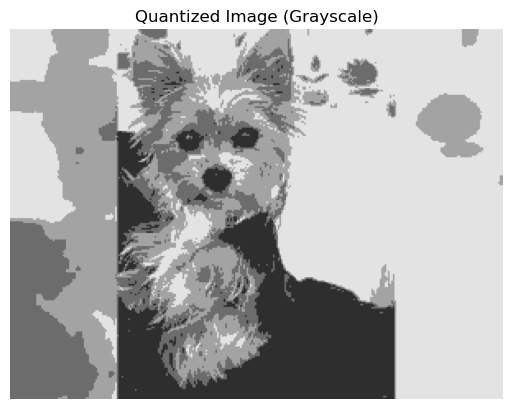


Processing Image 2...


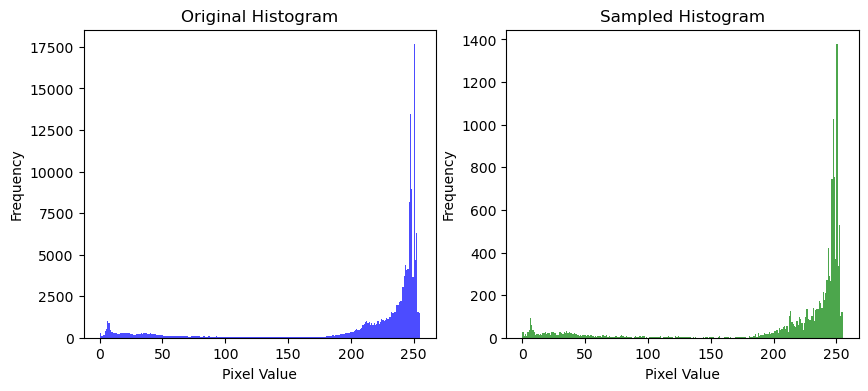

Quantized Levels in RGB: [[239 239 238]
 [ 44  38  37]]


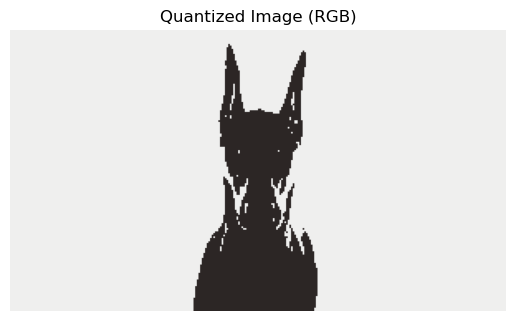

Quantized Levels in RGB: [[246 246 246]
 [ 26  22  22]
 [213 212 212]
 [105  93  87]]


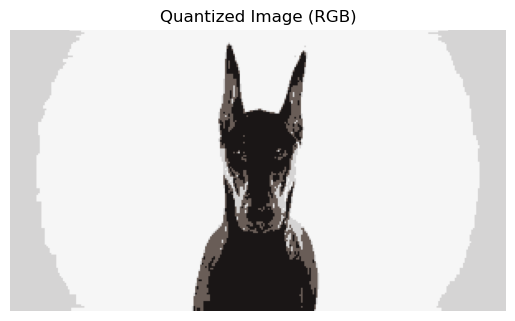

Quantized Levels in RGB: [[237 237 237]
 [ 13  11  11]
 [197 196 195]
 [ 92  79  74]
 [218 218 217]
 [249 249 249]
 [145 132 125]
 [ 45  39  38]]


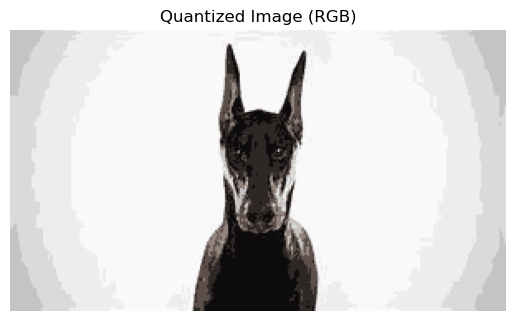

Quantized Levels in HSV: [[  3   1 213]
 [  6  14  23]
 [164  35  46]
 [  0   0 246]
 [130   3 242]
 [ 10 101  57]
 [  8  41 124]
 [ 20 236  18]]


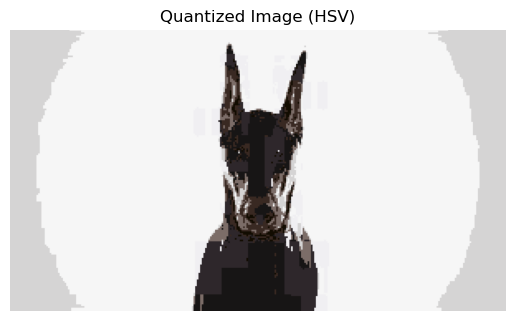

Quantized Levels in Grayscale: [[246 246 246]
 [ 23  23  23]
 [ 96  96  96]
 [212 212 212]]


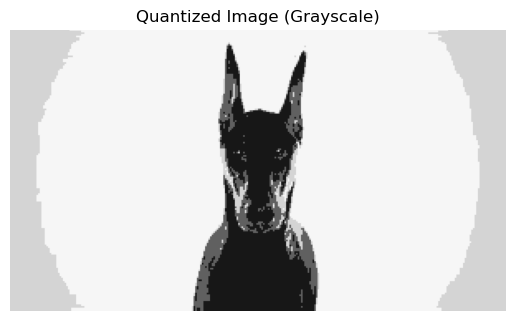


Processing Image 3...


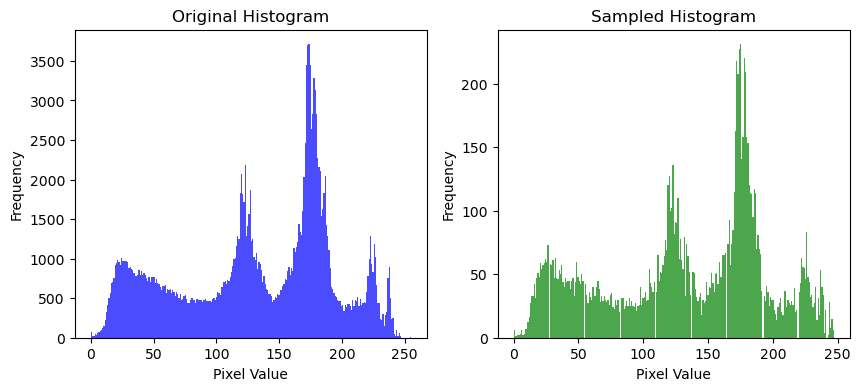

Quantized Levels in RGB: [[177 178 141]
 [ 59  52  46]]


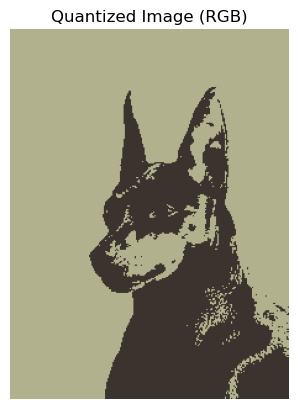

Quantized Levels in RGB: [[172 173 125]
 [104  91  81]
 [214 215 222]
 [ 41  36  32]]


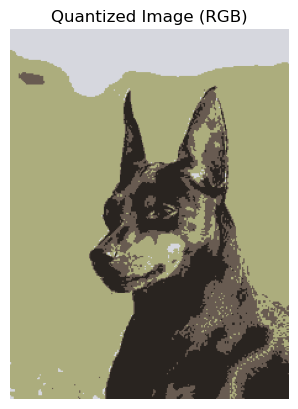

Quantized Levels in RGB: [[165 161 105]
 [ 31  28  24]
 [219 221 230]
 [109  96  86]
 [193 189 176]
 [ 68  59  52]
 [177 180 125]
 [145 145 137]]


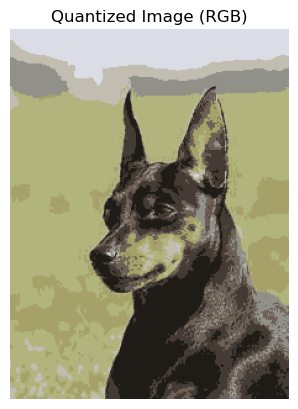

Quantized Levels in HSV: [[ 16 129  53]
 [ 31  81 180]
 [116  11 216]
 [ 14  20  94]
 [142  25  46]
 [ 17  31  40]
 [ 13 132 143]
 [ 31  23 160]]


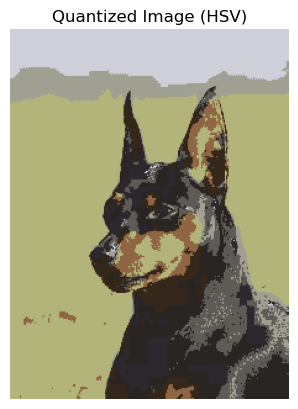

Quantized Levels in Grayscale: [[ 38  38  38]
 [168 168 168]
 [ 97  97  97]
 [216 216 216]]


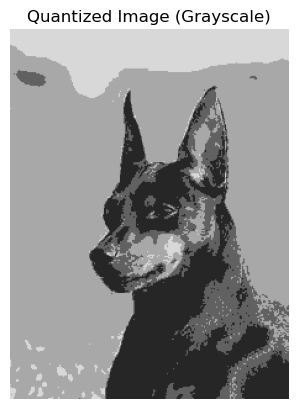


Processing Image 4...


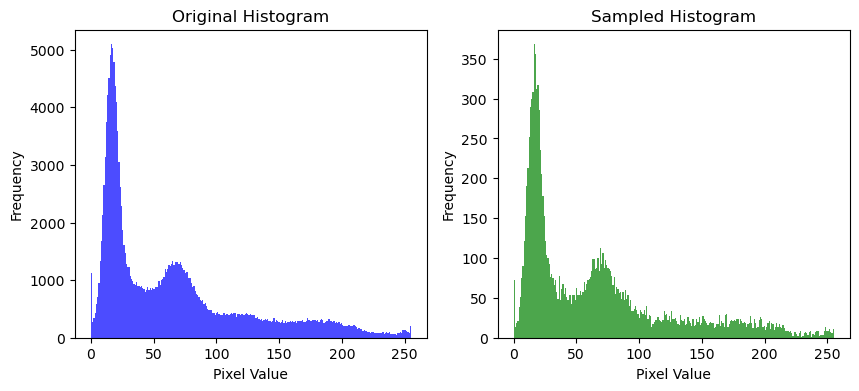

Quantized Levels in RGB: [[ 74  22  17]
 [187 108  60]]


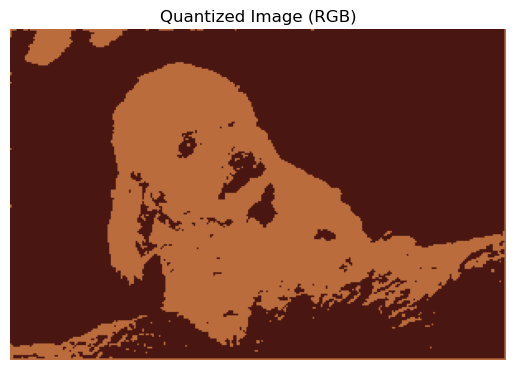

Quantized Levels in RGB: [[ 67  19  15]
 [235 181 119]
 [147  54  32]
 [186 115  59]]


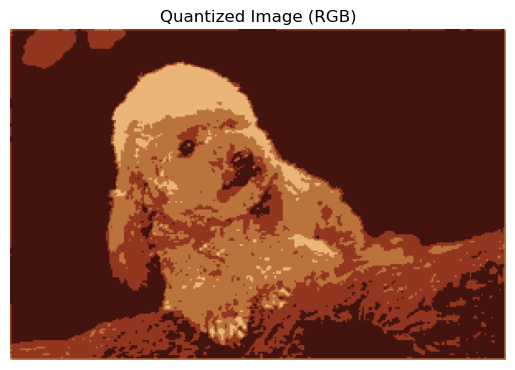

Quantized Levels in RGB: [[207  39  28]
 [ 73  19  15]
 [240 188 127]
 [198 131  67]
 [167  86  39]
 [122  41  26]
 [ 37  16  14]
 [112  90 107]]


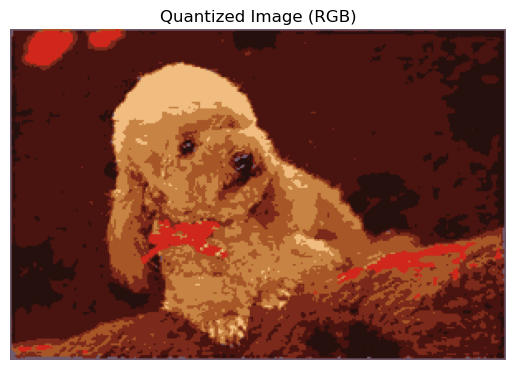

Quantized Levels in HSV: [[172 178  76]
 [  6 200 133]
 [ 11 192 186]
 [149  76  82]
 [ 15 121  31]
 [  4 224  69]
 [  2 195  71]
 [ 15 133 223]]


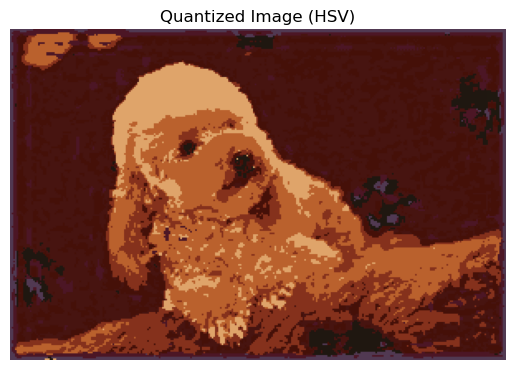

Quantized Levels in Grayscale: [[128 128 128]
 [ 33  33  33]
 [ 79  79  79]
 [187 187 187]]


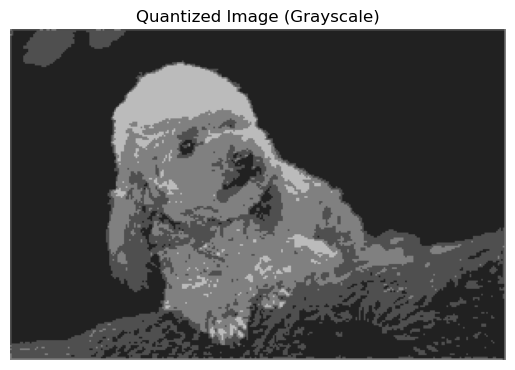

In [21]:
if __name__ == "__main__":
    images = load_images(DATASET_PATH)

    if not images:
        print("No images found. Please download a Kaggle dataset and place images in 'sample_images/' folder.")
    else:
        for idx, img in enumerate(images):
            print(f"\nProcessing Image {idx+1}...")

            sampled = sampling_image(img)
            analyze_sampling(img, sampled)

            for q in QUANTIZATION_LEVELS:
                quantized, centers = quantize_image(img, k=q)
                analyze_quantization(quantized, centers, "RGB")

            hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            quantized_hsv, centers_hsv = quantize_image(hsv_img, k=8)
            quantized_hsv_rgb = cv2.cvtColor(quantized_hsv, cv2.COLOR_HSV2RGB)
            analyze_quantization(quantized_hsv_rgb, centers_hsv, "HSV")

            gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            quantized_gray, centers_gray = quantize_image(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB), k=4)
            analyze_quantization(quantized_gray, centers_gray, "Grayscale")